In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [5]:
unregistered = pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/metrics/instance_data_allMarkers.csv')
registered = pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/metrics/unregistered_instance_data_allMarkers4.csv')

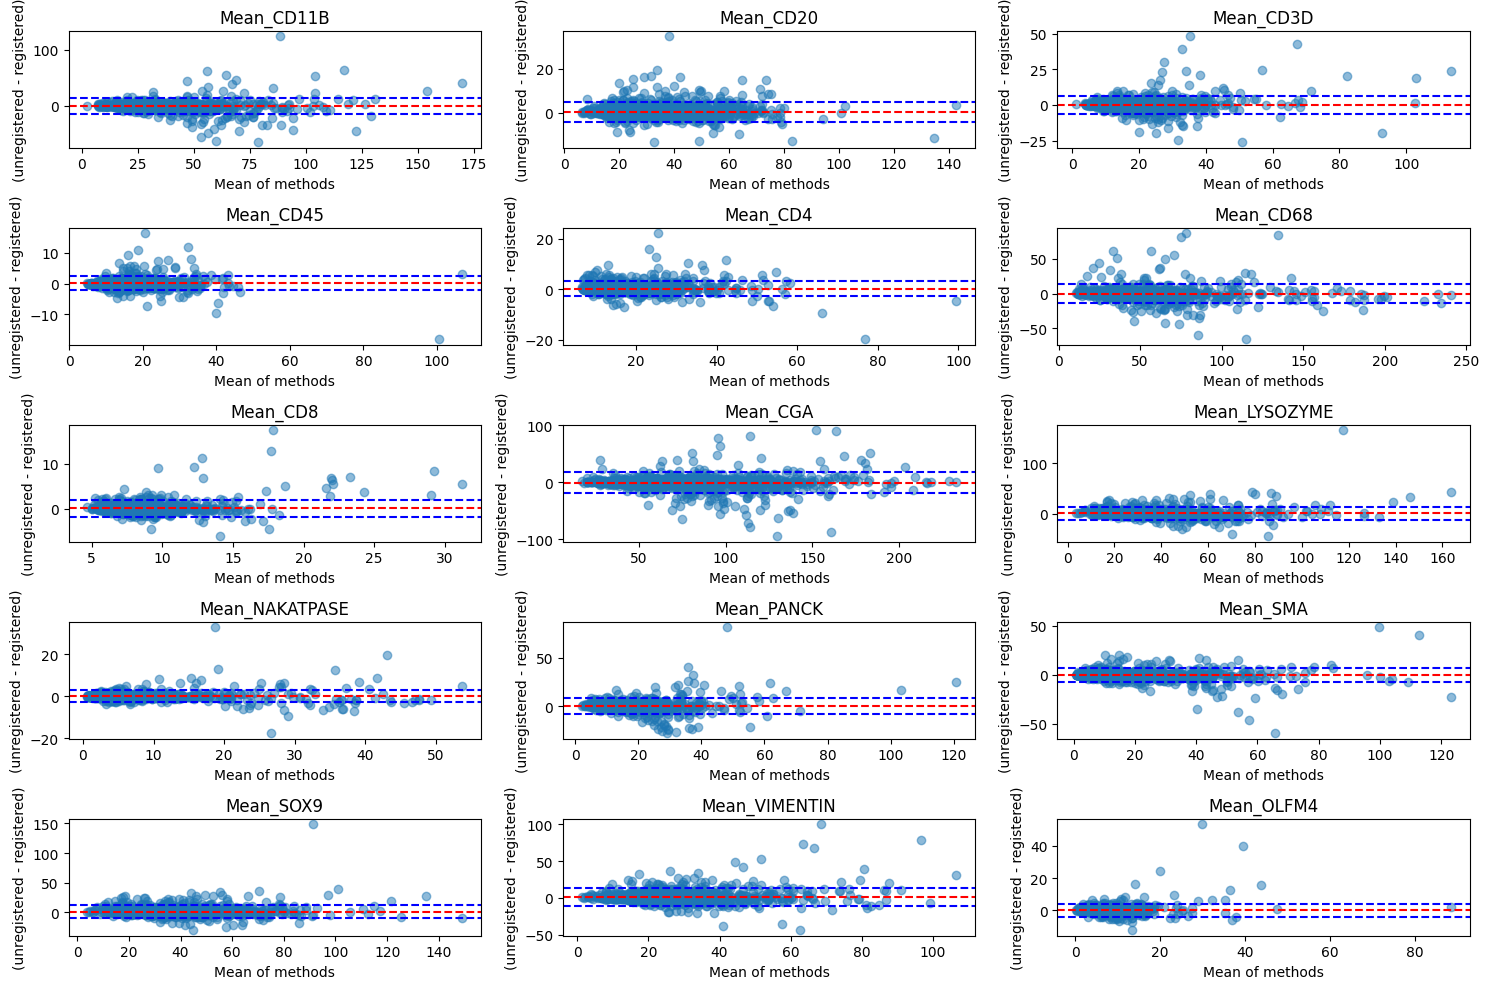

In [13]:
n = len(unregistered.columns[3:-1])

# Calculate the number of rows and columns for the subplots
ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array
axes = axes.ravel()

# Create a Bland-Altman plot for each column
for i, column in enumerate(unregistered.columns[3:-1]):
    mean = (unregistered[column] + registered[column]) / 2
    diff =(unregistered[column] - registered[column]) 
    sd_diff = 1.96*(np.std(diff, axis=0))
    axes[i].scatter(mean, diff, alpha=0.5)
    axes[i].axhline(y=np.mean(diff), color='r', linestyle='--')
    axes[i].axhline(y=np.mean(diff) + sd_diff, color='b', linestyle='--')  # +1 sigma line
    axes[i].axhline(y=np.mean(diff) - sd_diff, color='b', linestyle='--')  # -1 sigma line
    axes[i].set_title(column)
    axes[i].set_xlabel('Mean of methods')
    axes[i].set_ylabel('(unregistered - registered)')

# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: i

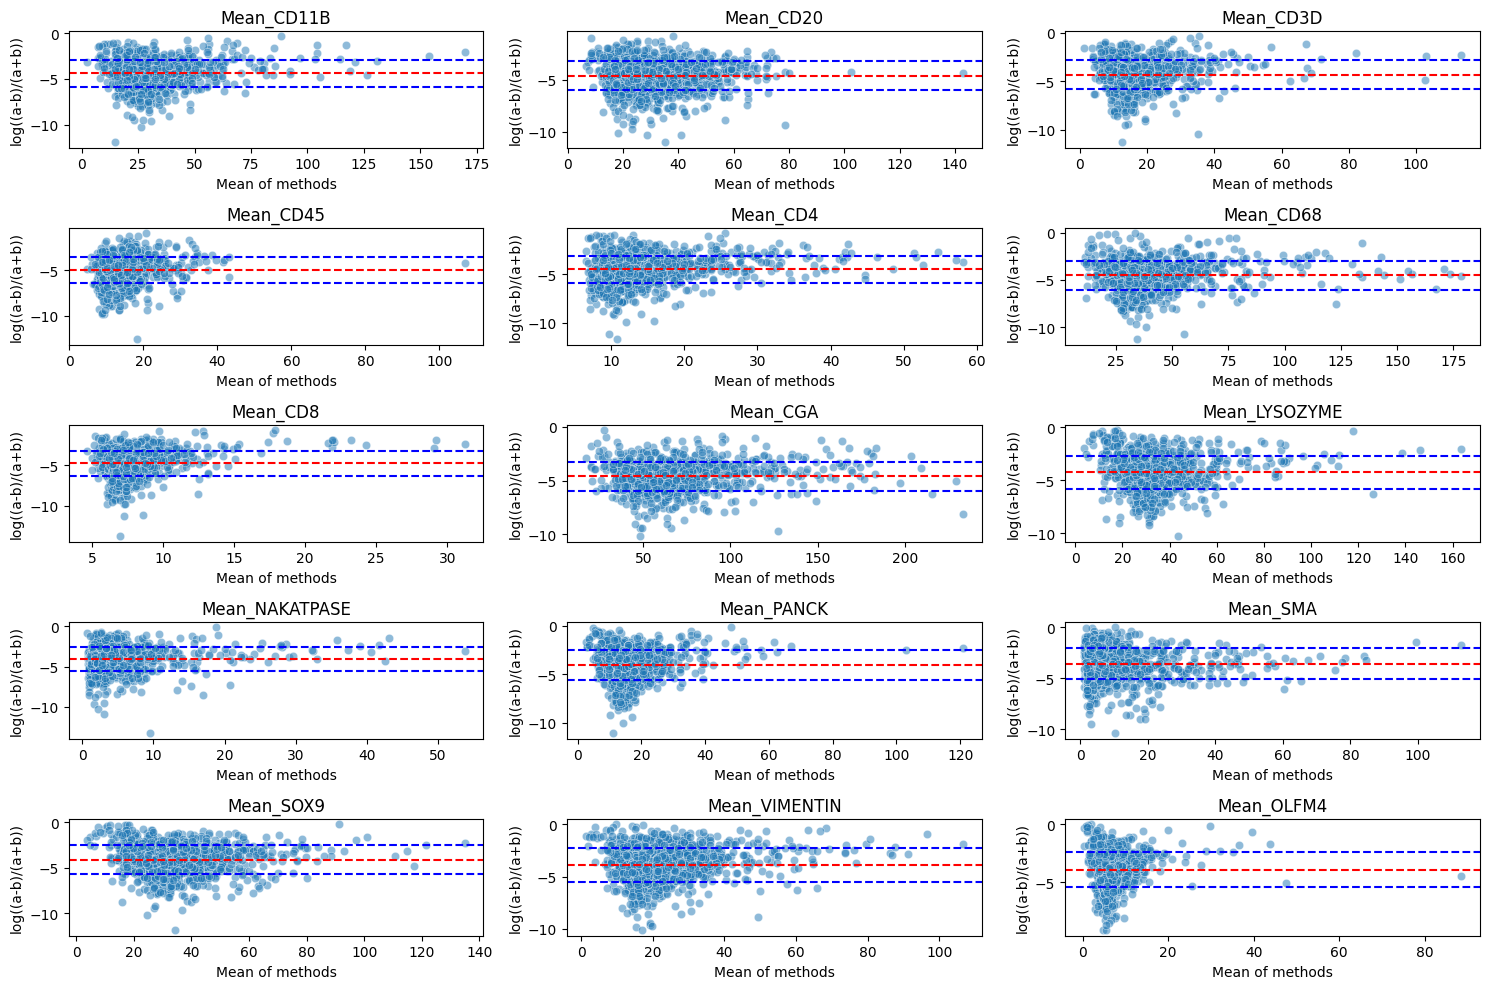

In [25]:
import seaborn as sns
# Calculate the number of rows and columns for the subplots
n = len(unregistered.columns[3:-1])

ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array
axes = axes.ravel()

# Create a Bland-Altman plot for each column
for i, column in enumerate(unregistered.columns[3:-1]):
    mean = (unregistered[column] + registered[column]) / 2
    diff_ratio = (unregistered[column] - registered[column]) / (unregistered[column] + registered[column])
    diff_ratio = diff_ratio.replace([np.inf, -np.inf], np.nan)
    diff_ratio.dropna(inplace=True)
    log_diff_ratio = np.log(diff_ratio+1e-6)
    sd_diff = np.std(log_diff_ratio, axis=0)
    sns.scatterplot(x=mean, y=log_diff_ratio, ax=axes[i], alpha=0.5)
    axes[i].axhline(y=np.mean(log_diff_ratio), color='r', linestyle='--')
    axes[i].axhline(y=np.mean(log_diff_ratio) + sd_diff, color='b', linestyle='--')  # +1 sigma line
    axes[i].axhline(y=np.mean(log_diff_ratio) - sd_diff, color='b', linestyle='--')  # -1 sigma line
    axes[i].set_title(column)
    axes[i].set_xlabel('Mean of methods')
    axes[i].set_ylabel('log((a-b)/(a+b))')

# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()